In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy.ndimage as ndimage
%matplotlib inline

/Users/blanch/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# El mapa del cielo a veces trae sorpresas

Ya que tenemos los datos y aunque no veamos nada en el centro del Clúster de Perseus, miremos cómo se ve el cielo extremo (el de los rayos gamma) alrededor de Perseus... lo podemos hacer con los mismos datos que usamos para hacer el ** theta plot **, igual que hizo Daniel para Cas A.

In [2]:
# Leemos los ficheros y les damos un nombre
perseus_ON= pd.read_csv('data/EvtList_ON_Perseus_All.txt', sep=' ')
perseus_OFF= pd.read_csv('data/EvtList_OFF_Perseus_All.txt', sep=' ')

# Definimos la variables de corte
had_cut = 0.20

# Seleccionamos los datos:
perseus_ON_cut = perseus_ON[perseus_ON['had'] < had_cut]
perseus_OFF_cut = perseus_OFF[perseus_OFF['had'] < had_cut]

# Miramos qué pinta tienen los datos que hemos cargado y seleccionado
perseus_ON_cut.head(5)

,had,theta2,XCam,YCam
0,0.077,0.139,-0.323,0.185
27,0.083,0.253,0.064,0.498
31,0.119,0.279,0.452,-0.271
34,0.117,0.545,-0.688,-0.266
42,0.119,0.478,0.677,-0.136


Fíjate que ahora tenemos dos columnas nuevas: ** XCam ** y ** YCam **. Éstas nos indican para cada evento la dirección de donde creemos que viene. Cada posición en la cámara indica una posición en el cielo.

------

Veámos en detalle como lo hacía Daniel en su función ** skymap **.

En comparación con el ** thetaplot ** aquí queremos representar los datos en 2 dimensiones: posiciones X y Y. Para eso tenemos que usar la función ** np.histogram2d ** en lugar de ** pl.hist **. Funciona de forma muy similar. Solo que necesitamos darle dos variables, por ejemplo ** camX_perseus ** y ** camY_perseus **.

Además, la dirección de llegada de cada evento tiene un error. Esto implica que cada evento tiene probabilidad de venir no sólo de un punto concreto sino de una región del cielo. Para tener esto en cuenta ponemos contribución de cada evento a la dirección reconstruida y sus alrededores. Esto lo hacemos con las instrucciones para los datos OFF y ON:

> img1 = ndimage.gaussian_filter(hist_off, sigma=(5, 2), order=0)

> img2 = ndimage.gaussian_filter(hist_perseus, sigma=(5, 2), order=0)

Ahora podemos calcular los excesos haciendo ON menos OFF:

> hist_excess = np.subtract(img2, img1)

Además, sabemos que la eficiencia para detectar eventos no es la misma en toda la cámara. Una forma simple para evaluar esta eficiencia es usar los datos OFF y simplemente dividir los excesos por el OFF que hay en cada punto de la cámara. Para eso hacemos:

> hist_excess = np.divide(hist_excess, img1)

Y sólo nos faltaría mostrar el gráfico 2D que queda después de haber hecho estas operaciones.

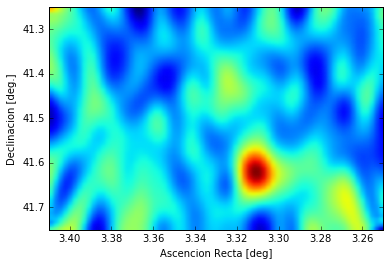

In [5]:
#Skymap de los datos seleccionados: 
hist_perseus, xedge, yedge = np.histogram2d(perseus_ON_cut.XCam, perseus_ON_cut.YCam, bins=71)
hist_off, xedge, yedge = np.histogram2d(perseus_OFF_cut.XCam, perseus_OFF_cut.YCam, bins=71)
img1 = ndimage.gaussian_filter(hist_off, sigma=(5, 2), order=0)
img2 = ndimage.gaussian_filter(hist_perseus, sigma=(5, 2), order=0)
hist_excess = np.subtract(img2, img1)
hist_excess = np.divide(hist_excess, img1)
pl.imshow(hist_excess, interpolation='gaussian', extent=[3.41,3.25,41.75,41.25],aspect="auto")
pl.xlabel('Ascencion Recta [deg]')
pl.ylabel('Declinacion [deg.]')
pl.show()

Eh! Ahí hay algo... Y de hecho no recuerdo haberlo visto antes. Miremos si está siempre o solo en los datos que tomamos ayer.

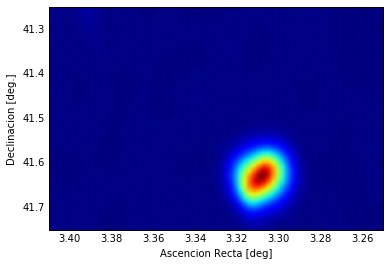

In [4]:
# Leemos los ficheros y les damos un nombre:
perseus_ON= pd.read_csv('data/EvtList_ON_Perseus_LastDay.txt', sep=' ')
perseus_OFF= pd.read_csv('data/EvtList_OFF_Perseus_LastDay.txt', sep=' ')

# Definimos la variables de corte:
had_cut = 0.20

# Seleccionamos los datos:
perseus_ON_cut = perseus_ON[perseus_ON['had'] < had_cut]
perseus_OFF_cut = perseus_OFF[perseus_OFF['had'] < had_cut]

# Representamos el Skymap:
hist_perseus, xedge, yedge = np.histogram2d(perseus_ON_cut.XCam, perseus_ON_cut.YCam, bins=71)
hist_off, xedge, yedge = np.histogram2d(perseus_OFF_cut.XCam, perseus_OFF_cut.YCam, bins=71)
img1 = ndimage.gaussian_filter(hist_off, sigma=(5, 2), order=0)
img2 = ndimage.gaussian_filter(hist_perseus, sigma=(5, 2), order=0)
hist_excess = np.subtract(img2, img1)
hist_excess = np.divide(hist_excess, img1)
pl.imshow(hist_excess, interpolation='gaussian', extent=[3.41,3.25,41.75,41.25],aspect="auto")
pl.xlabel('Ascencion Recta [deg]')
pl.ylabel('Declinacion [deg.]')
pl.show()

Ayer se veía muy bien ... a ver en el resto de los datos ...

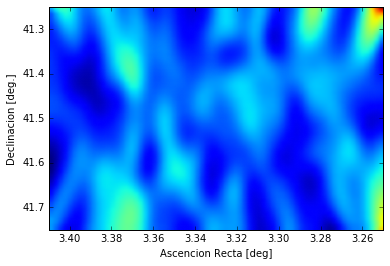

In [5]:
# Leemos los ficheros y les damos un nombre:
perseus_ON= pd.read_csv('data/EvtList_ON_Perseus_Other.txt', sep=' ')
perseus_OFF= pd.read_csv('data/EvtList_OFF_Perseus_Other.txt', sep=' ')

# Definimos la variables de corte:
had_cut = 0.20

# Seleccionamos los datos:
perseus_ON_cut = perseus_ON[perseus_ON['had'] < had_cut]
perseus_OFF_cut = perseus_OFF[perseus_OFF['had'] < had_cut]

# Representamos el Skymap:
hist_perseus, xedge, yedge = np.histogram2d(perseus_ON_cut.XCam, perseus_ON_cut.YCam, bins=71)
hist_off, xedge, yedge = np.histogram2d(perseus_OFF_cut.XCam, perseus_OFF_cut.YCam, bins=71)
img1 = ndimage.gaussian_filter(hist_off, sigma=(5, 2), order=0)
img2 = ndimage.gaussian_filter(hist_perseus, sigma=(5, 2), order=0)
hist_excess = np.subtract(img2, img1)
hist_excess = np.divide(hist_excess, img1)
pl.imshow(hist_excess, interpolation='gaussian', extent=[3.41,3.25,41.75,41.25],aspect="auto")
pl.xlabel('Ascencion Recta [deg]')
pl.ylabel('Declinacion [deg.]')
pl.show()

Y en el resto de los datos no hay nada ... esto es lo que llamamos un flare y parece ser muy intenso. Si quieres saber más sobre flares, pasa una noche con Leyre ... yo ahora mismo la aviso y le digo que he visto este.